<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/Deep%20Learning/Image_processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

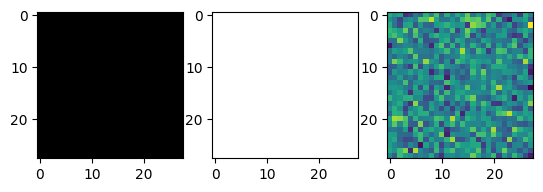

In [ ]:
black = np.zeros([28,28,3], dtype = np.uint8)
white = np.ones([28,28,3], dtype = np.uint8) * 255
noise = np.random.normal(0,1,(28,28))
img_types = [black, white, noise]
fig, axes = plt.subplots(1,3)
for i in range(3):
  axes[i].imshow(img_types[i])

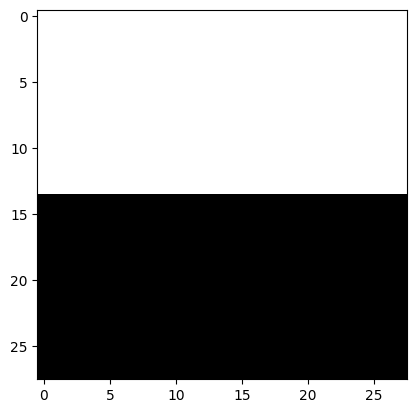

In [ ]:
# Half white, half black
halfbw = np.zeros([28,28,3], dtype=np.uint8)
halfbw[:14,:] = 255
plt.imshow(halfbw)

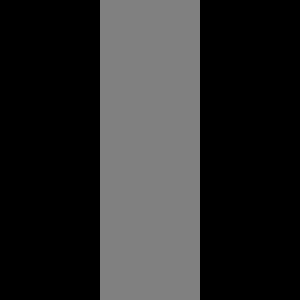

In [ ]:
# gray
halfbw = np.zeros([300,300,3], dtype=np.uint8)
halfbw[:,100:200,:] = 128
cv2_imshow(halfbw)

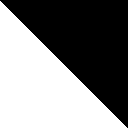

In [ ]:
# Triangles in an image
img = np.zeros([128,128,3])
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if i>j:
      img[i,j] = 255
    else:
      img[i,j] = 0

cv2_imshow(img);

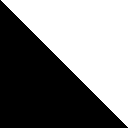

In [ ]:
img2 = np.array([[255 if i < j else 0 for j in range(128)] for i in range(128)], dtype=np.uint8)
cv2_imshow(img2)

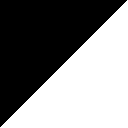

In [ ]:
# Triangles in an image
img = np.zeros([128,128,3])
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if i+j >= 128-1:
      img[i,j] = 255
    else:
      img[i,j] = 0

cv2_imshow(img);

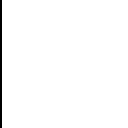

In [ ]:
# Triangles in an image
tri = np.zeros([128,128,3])
for i in range(tri.shape[1]):
  for j in range(tri.shape[0]):
    if i+j >= 128-1 and j >1:
      tri[i,j] = 255
    elif i+j >= 128-1 and j<1:
      tri[i,j] = 0
    elif i+j <= 128-1 and

cv2_imshow(tri);

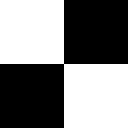

In [ ]:
img4t = np.zeros([128, 128, 3], dtype=np.uint8)

# Define the center of the image
center_x, center_y = img4t.shape[1] // 2, img4t.shape[0] // 2

# Create white triangles in the top-left and bottom-right quadrants
img4t[:center_y, :center_x] = 255
img4t[center_y:, center_x:] = 255

cv2_imshow(img4t)

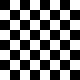

In [ ]:
chess = np.ones((80,80, 3), dtype=np.uint8) * 255

# Create the chessboard pattern
for i in range(8):
    for j in range(8):
        if (i + j) % 2 == 0:
            x1, y1 = i*10, j*10
            x2, y2 = (i+1)*10 , (j+1)*10
            chess[y1:y2,x1:x2]= 0

cv2_imshow(chess)

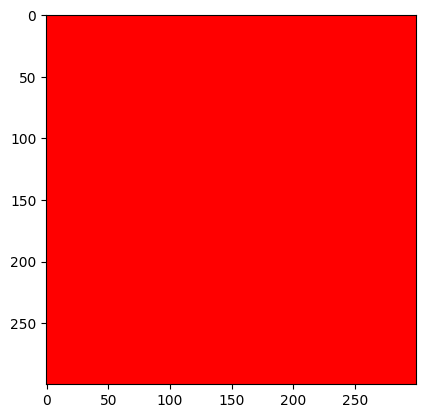

In [ ]:
red = np.zeros([300,300,3], dtype=np.uint8)
#cv2 reads as BGR
red[:,:,0] = 255
plt.imshow(red)

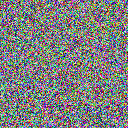

In [ ]:
noisy = np.random.random((128,128,3)) * 255
cv2_imshow(noisy)

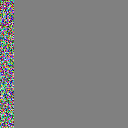

In [ ]:
noisy[:,14:] = 128
cv2_imshow(noisy)

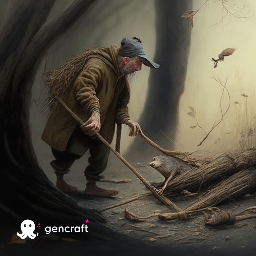

In [32]:
!cp /content/drive/MyDrive/gencraft_im.png /content
image = cv2.imread('/content/gencraft_im.png')
image = cv2.resize(image, (256,256))
cv2_imshow(image)

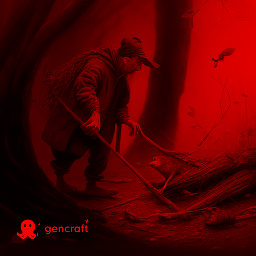

In [33]:
# Red Channel
img_red = np.zeros(image.shape)
img_red[:,:,2] = image[:,:,2]
cv2_imshow(img_red)

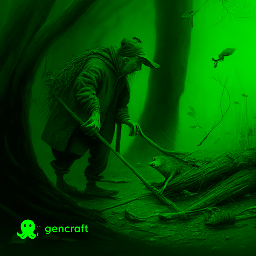

In [34]:
# Green Channel
img_green = np.zeros(image.shape)
img_green[:,:,1] = image[:,:,1]
cv2_imshow(img_green)

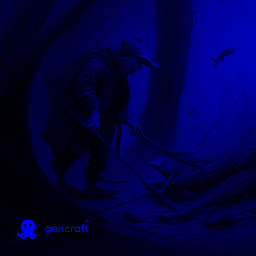

In [35]:
# Blue Channel
img_blue = np.zeros(image.shape)
img_blue[:,:,0] = image[:,:,0]
cv2_imshow(img_blue)

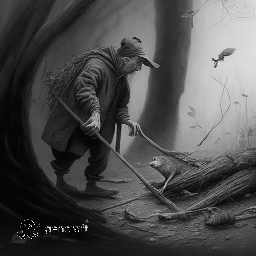

In [36]:
# Standard way to convert to grayscale
image_gray = np.uint8(0.11 * image[:,:,0] + 0.62 * image[:,:,1] + 0.29 * image[:,:,2])
cv2_imshow(image_gray)

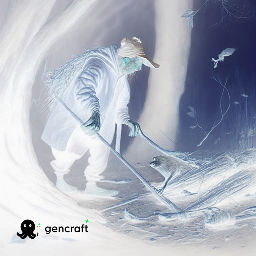

In [37]:
neg_img = 255 - image

cv2_imshow(neg_img)

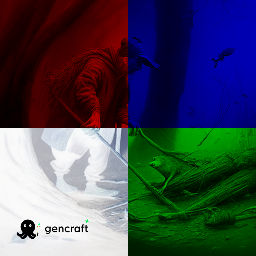

In [38]:
# Split the image into 4 quadrants
image_xc = image.shape[1] // 2  # Half of the image's width
image_yc = image.shape[0] // 2  # Half of the image's height

# Create a red channel with the same shape as the first quadrant
img_red = np.zeros_like(image[:image_yc, :image_xc])
img_red[:, :, 2] = image[:image_yc, :image_xc][:, :,2]

# Create a blue channel with the same shape as the second quadrant
img_blue = np.zeros_like(image[:image_yc, image_xc:])
img_blue[:,:,0] = image[:image_yc, image_xc:][:,:,0]

# Create a green channel with same shape as the fourth quadrant
img_green = np.zeros_like(image[image_yc:, image_xc:])
img_green[:,:,1] = image[image_yc:, image_xc:][:,:,1]

# Create a black channel with same shape as third quadrant
img_3q = image[image_yc:, :image_xc]
neg = 255 - img_3q

# Replace the first quadrant with red channel
image[:image_yc, :image_xc] = img_red

# Replace the second quadrant with blue channel
image[:image_yc, image_xc:] = img_blue

# Replace the third quadrant with negative
image[image_yc:, :image_xc] = neg

# Replace the fourth quadrant with green channel
image[image_yc:, image_xc:] = img_green

# Display the modified image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()